In [1]:
!pip install -U tensorflow

     -------------------------------------- 375.9/375.9 MB 4.7 MB/s eta 0:00:00
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
     ------------------------------------- 434.8/434.8 kB 26.5 MB/s eta 0:00:00
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
     ---------------------------------------- 4.5/4.5 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 12.8 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 10.6 MB/s eta 0:00:00
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.wh

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mirun\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --user --upgrade numpy

     ---------------------------------------- 13.1/13.1 MB 8.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install --user tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.74.0-cp311-cp311-win_amd64.whl (4.5 MB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.11.2-py3-none-any.whl (1.4 MB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl (2.9 MB)
  Using cached ml_dtypes-0.5.3-cp311-cp311-win_amd64.whl (206 kB)
  Using cached markdown-3.8.2-py3-none-any.whl (106 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def plot_pred_vs_actual(index, y_true, y_pred, model_name, start=None, end=None, save_path=None):
    """
    index     : pandas.DatetimeIndex (or array-like) aligned with y_true/y_pred
    y_true    : 1D array-like of actual values
    y_pred    : 1D array-like of predictions (aligned to y_true)
    model_name: label for the title/legend
    start,end : optional slice to zoom (e.g., '2016-05-10', '2016-05-15' or integer slice)
    save_path : optional path to save the PNG
    """
    
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    dfp = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}, index=index)
    if start is not None or end is not None:
        dfp = dfp.loc[start:end]

    plt.figure(figsize=(12,5))
    plt.plot(dfp.index, dfp["y_true"], label="Actual", alpha=0.9)
    plt.plot(dfp.index, dfp["y_pred"], label=model_name, alpha=0.85)
    plt.title(f"{model_name} — Predicted vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Energy (Appliances)")
    plt.legend()
    plt.tight_layout()
    if save_path:
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=120, bbox_inches="tight")
    plt.show()

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return float(np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100)

def log_model_result(model_name, y_true, y_pred, n_params=None, extra=None,
                     csv_path="reports/model_scores.csv"):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    mae  = float(mean_absolute_error(y_true, y_pred))
    rmse = float(mean_squared_error(y_true, y_pred) ** 0.5)
    mp   = mape(y_true, y_pred)

    row = {"model": model_name, "MAE": mae, "RMSE": rmse, "MAPE": mp,
           "n_params": (int(n_params) if n_params is not None else np.nan)}
    if isinstance(extra, dict):
        row.update(extra)

    p = Path(csv_path)
    p.parent.mkdir(parents=True, exist_ok=True)
    header = not p.exists()
    pd.DataFrame([row]).to_csv(p, mode="a", header=header, index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pathlib import Path

Path("reports/figures").mkdir(parents=True, exist_ok=True)
df = pd.read_csv("data/raw/energydata_complete.csv", parse_dates=["date"])
df = df.sort_values("date").set_index("date").resample("h").mean().interpolate()

target = "Appliances"

X_df = df[[target]].copy()
y_df = df[[target]].copy()

split = int(len(df) * 0.8)
X_train_df, X_test_df = X_df.iloc[:split], X_df.iloc[split:]
y_train_df, y_test_df = y_df.iloc[:split], y_df.iloc[split:]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train_df)
X_test  = scaler_X.transform(X_test_df)
y_train = scaler_y.fit_transform(y_train_df)
y_test  = scaler_y.transform(y_test_df)

def make_sequences(X, y, lookback=72):
    Xs, ys = [], []
    for i in range(lookback, len(X)):
        Xs.append(X[i-lookback:i])
        ys.append(y[i])         
    return np.array(Xs), np.array(ys)

LOOKBACK = 72
X_tr_seq, y_tr_seq = make_sequences(X_train, y_train, LOOKBACK)
X_te_seq, y_te_seq = make_sequences(X_test,  y_test,  LOOKBACK)

X_tr_seq.shape, y_tr_seq.shape, X_te_seq.shape, y_te_seq.shape

((2560, 72, 1), (2560, 1), (586, 72, 1), (586, 1))

C:\Users\mirun\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0210 - val_loss: 0.0142 - learning_rate: 0.0010
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0175 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0155 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0151 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0148 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0144 - val_loss: 0.0114 - learning_rate: 0.0010
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0143 - val_loss: 0.0112 - learning_rate: 0.0010
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0140 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0137 - val_loss: 0.0109 - learning_rate: 0.0010
Epoch 10/30
36/36 

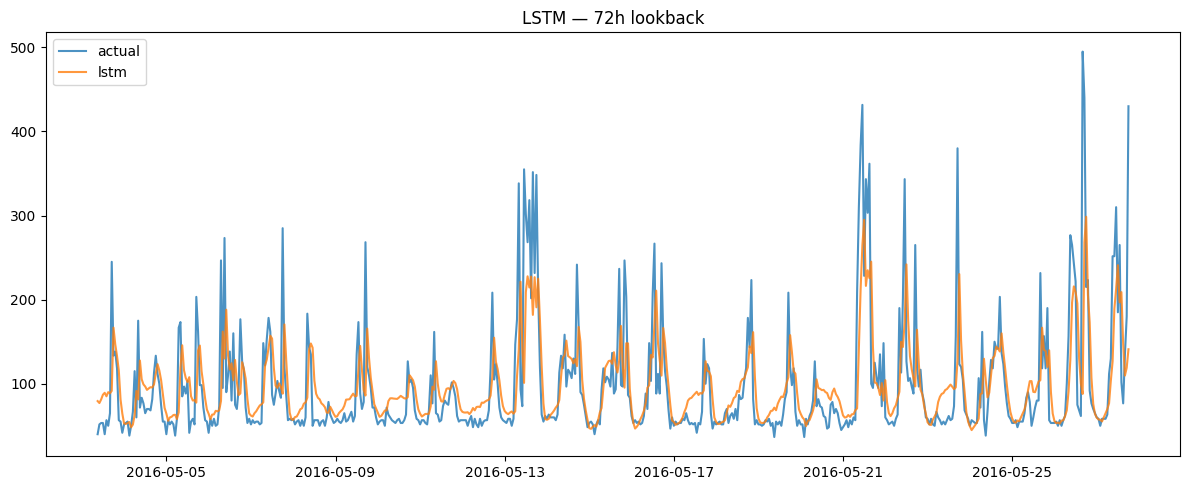

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

tf.random.set_seed(7)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(LOOKBACK, X_tr_seq.shape[-1])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=1)

hist = model.fit(
    X_tr_seq, y_tr_seq,
    validation_split=0.1,
    epochs=30,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)

pred_scaled = model.predict(X_te_seq, verbose=0)

y_true = scaler_y.inverse_transform(y_te_seq)
y_pred = scaler_y.inverse_transform(pred_scaled)

mae  = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
print({"LSTM_MAE": mae, "LSTM_RMSE": rmse})

plot_index = y_test_df.index[LOOKBACK+0:]  
plt.figure(figsize=(12,5))
plt.plot(plot_index, y_true, label="actual", alpha=0.8)
plt.plot(plot_index, y_pred, label="lstm", alpha=0.8)
plt.title("LSTM — 72h lookback")
plt.legend(); plt.tight_layout(); plt.show()

pd.DataFrame({"metric":["MAE","RMSE"], "value":[mae, rmse]}).to_csv(
    "reports/figures/lstm_metrics.csv", index=False
)
model.save("models/lstm_72h_next_hour.keras")


In [6]:
log_model_result(
    model_name="LSTM_72h_lookback",  
    y_true=y_true,                   
    y_pred=y_pred,                   
    n_params=model.count_params(),    
)

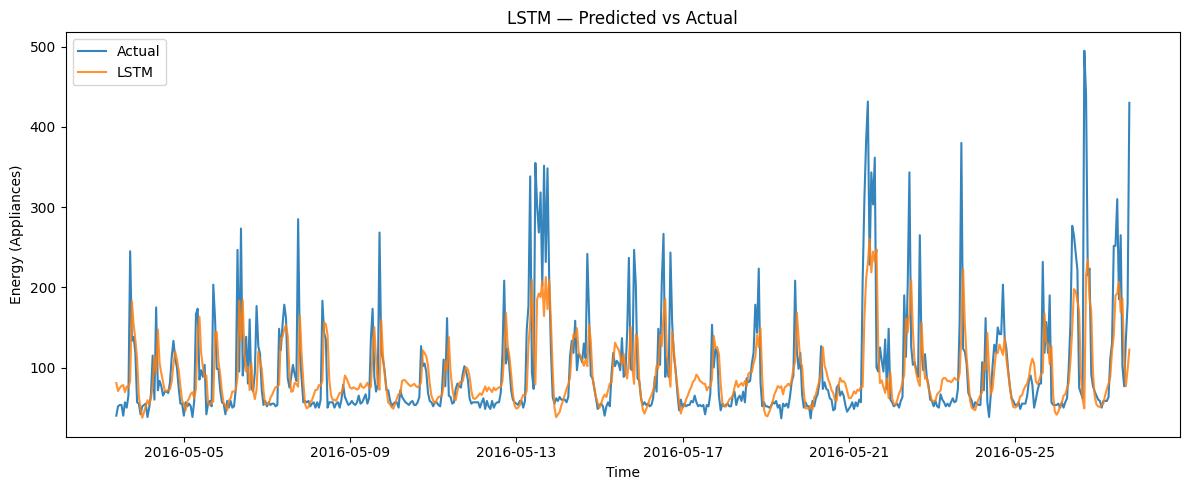

In [9]:
plot_pred_vs_actual(
    index=plot_index,
    y_true=y_true.reshape(-1),
    y_pred=y_pred.reshape(-1),
    model_name="LSTM",
    save_path="reports/figures/lstm_pred_vs_actual.png"
)

In [4]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(LOOKBACK, X_tr_seq.shape[-1])),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

es  = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=1)

hist = model.fit(
    X_tr_seq, y_tr_seq,
    validation_split=0.1,
    epochs=40,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)

pred_scaled = model.predict(X_te_seq, verbose=0)
y_true = scaler_y.inverse_transform(y_te_seq).ravel()
y_pred = scaler_y.inverse_transform(pred_scaled).ravel()

mae  = float(np.mean(np.abs(y_true - y_pred)))
rmse = float(np.sqrt(np.mean((y_true - y_pred) ** 2)))
print({"LSTM_bi_MAE": mae, "LSTM_bi_RMSE": rmse})

Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.0215 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0158 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0149 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0147 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0140 - val_loss: 0.0198 - learning_rate: 0.0010
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0141 - val_loss: 0.0193 - learning_rate: 0.0010
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0141 - val_loss: 0.0196 - learning_rate: 0.0010
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0137 - val_loss: 0.0182 - learning_rate: 0.0010
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0137 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 10/40
36/36